#**Proyecto de Regresion lineal simple (Blood Glucose Prediction)**
### **Wilson Estrada**

#**Librerias necesarias**



In [ ]:
# Librerias necesarias
# ==============================================================================

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import style
import statistics

#**Carga de datos**
Diabetes Dataset de https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset


In [ ]:
sns.set(style="whitegrid", context="notebook")
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## Verifico y cambio los datos nulos de las variables

df.iloc[:, 1:6] = df.iloc[:, 1:6].replace(to_replace=[0], value=np.nan)
df = df.apply(
    axis = "rows",
    func = lambda column: column.fillna(column.mean())
)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


#**Actualización de datos**

In [ ]:
# Datos
# ==============================================================================

Glucose = df['Glucose'].tolist()
BMI = df['BMI'].tolist()
Age = df['Age'].tolist()


# Creación del DataFrame Nuevo
# ==============================================================================
df = pd.DataFrame({'Glucose': Glucose, 'BMI': BMI, 'Age': Age})
df.head() #Visualizar las primeras 5 filas



,Glucose,BMI,Age
0,148.0,33.6,50
1,85.0,26.6,31
2,183.0,23.3,32
3,89.0,28.1,21
4,137.0,43.1,33


In [ ]:
# Obtener el número de filas y columnas del DataFrame
num_filas, num_columnas = df.shape

# Imprimir el número de filas y columnas
print("Número de filas: ", num_filas)
print("Número de columnas: ", num_columnas)

Número de filas:  768
Número de columnas:  3


In [ ]:
## Para generar otra lista con base a la operacion de 2 existentes, se puede hacer la siguiente recomendacion:
relacion_gl_bmi = [round(Glucose[i] / BMI[i], 2) for i in range(len(BMI))]

# Creación del DataFrame resultante
# ==============================================================================
df = pd.DataFrame({'Glucose': Glucose, 'BMI': BMI, 'Age': Age, 'RelacionGl/BM': relacion_gl_bmi})
df.head() #Visualizar las primeras 5 filas


,Glucose,BMI,Age,RelacionGl/BM
0,148.0,33.6,50,4.40
1,85.0,26.6,31,3.20
2,183.0,23.3,32,7.85
3,89.0,28.1,21,3.17
4,137.0,43.1,33,3.18


In [ ]:
# Obtener el número de filas y columnas del DataFrame
num_filas, num_columnas = df.shape

# Imprimir el número de filas y columnas
print("Número de filas: ", num_filas)
print("Número de columnas: ", num_columnas)

Número de filas:  768
Número de columnas:  4


#**Estadísticas de datos**

In [ ]:
print("Estadísticas de BMI:")
print("Media:", round(statistics.mean(BMI), 3))
print("Mediana:", statistics.median(BMI))
print("Valor máximo:", max(BMI))
print("Valor mínimo:", min(BMI))

print("\nEstadísticas de Glucosa:")
print("Media:", round(statistics.mean(Glucose), 3))
print("Mediana:", statistics.median(Glucose))
print("Valor máximo:", max(Glucose))
print("Valor mínimo:", min(Glucose))

print("\nEstadísticas de Edad:")
print("Media:", round(statistics.mean(Age), 3))
print("Mediana:", statistics.median(Age))
print("Valor máximo:", max(Age))
print("Valor mínimo:", min(Age))

print("\nEstadísticas de RelacionGl/BM:")
print("Media:", round(statistics.mean(relacion_gl_bmi), 3))
print("Mediana:", statistics.median(relacion_gl_bmi))
print("Valor máximo:", max(relacion_gl_bmi))
print("Valor mínimo:", min(relacion_gl_bmi))

Estadísticas de BMI:
Media: 32.457
Mediana: 32.4
Valor máximo: 67.1
Valor mínimo: 18.2

Estadísticas de Glucosa:
Media: 121.687
Mediana: 117.0
Valor máximo: 199.0
Valor mínimo: 44.0

Estadísticas de Edad:
Media: 33.241
Mediana: 29.0
Valor máximo: 81
Valor mínimo: 21

Estadísticas de RelacionGl/BM:
Media: 3.869
Mediana: 3.75
Valor máximo: 8.26
Valor mínimo: 1.48


#**Reprentacion de datos y relación**

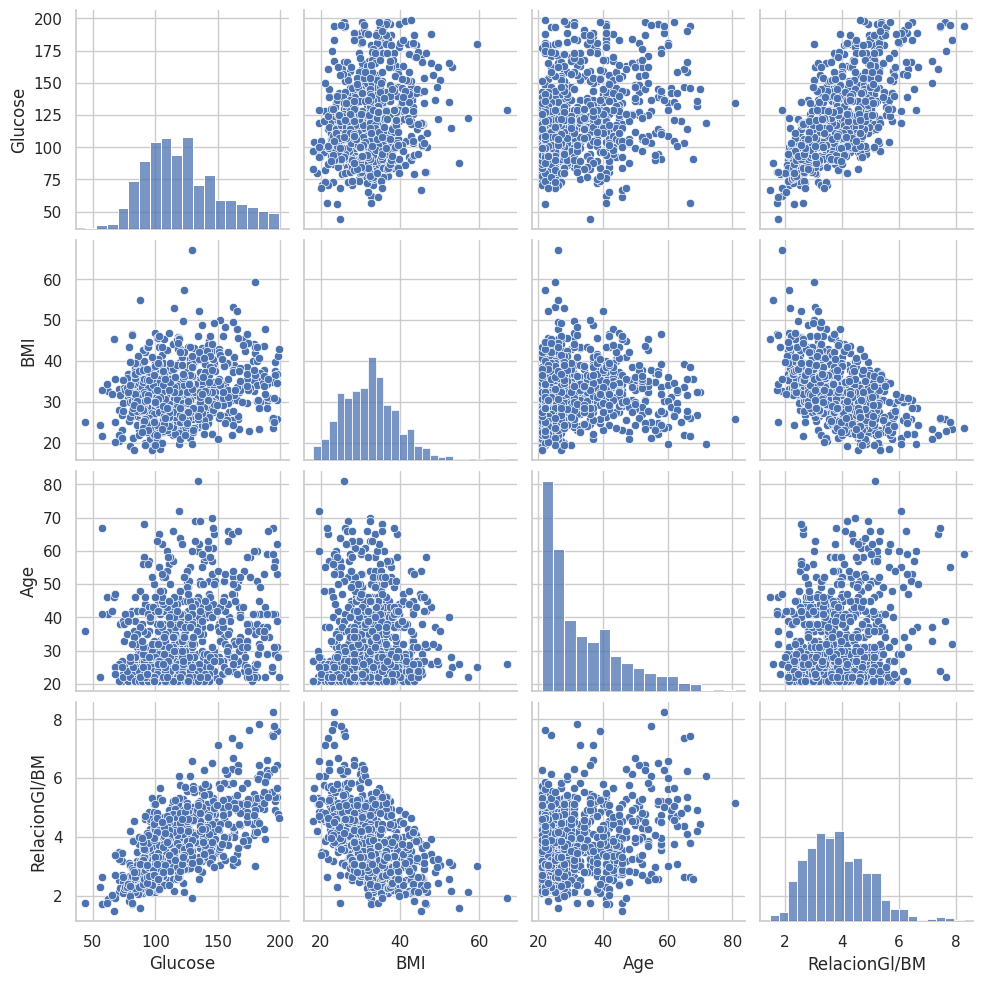

In [ ]:
# Distribuciones
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid',context='notebook') # Darle estilo a las graficas para que estas se vean mucho mejor
cols = ['Glucose', 'BMI','Age','RelacionGl/BM']
sns.pairplot(df[cols], height = 2.5) 
plt.show()

# Matriz de graficas done la diagonal presenta una distribucion de la variable que aparece en la fila
# Se debe analizar visualmente las graficas para poder entender un poco mejor el contexto

<Figure size 1000x1000 with 0 Axes>

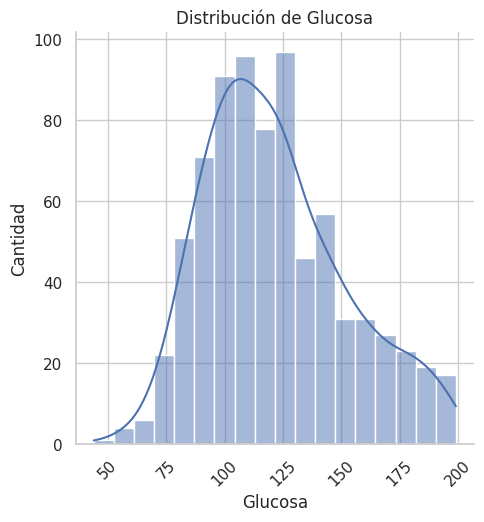

In [ ]:
## Distribucion aislada de la variable a predecir

plt.figure(figsize=(10,10))
sns.displot(data=df, x=df['Glucose'], kde=True)
plt.title('Distribución de Glucosa')
plt.xlabel('Glucosa')
plt.xticks(rotation=45)
plt.ylabel('Cantidad')
plt.show()

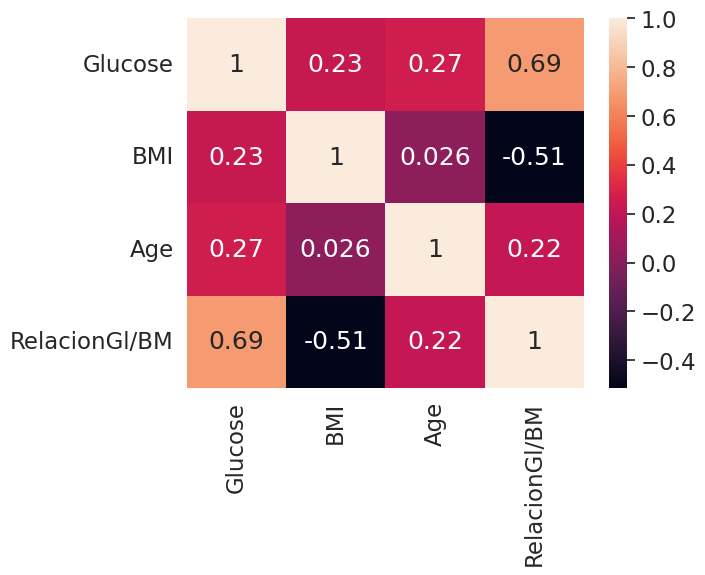

In [ ]:
# coeficiente de correlacion entre las variables.

from matplotlib import numpy
import numpy as np

cm = np.corrcoef(df[cols].values.T) # Saca el coeficiente de correlacion entre todas las variables que le pasemos
sns.set(font_scale=1.5)  # ajusta el texto para que se vea bien
sns.heatmap(cm, cbar=True, annot=True,yticklabels=cols,xticklabels=cols);# cbar: mostrar informacion al lado (Barra) para poder entender el indice del mapa de calor
                                                                         # annot: poner los valores que se usan para el mapa de calor
                                                                         # yticklabels: solamente la info de las columnas que se estan usando
                                                                         # xticklabels: solamente la info de las columnas que se estan usando
                                                                         # Values: le tenemos que dar la informacion como un arreglo a numpy
                                                                         # T: Pone los datos para que numpy los pueda leer adecuadamente

#**Creación del modelo e información de metricas**
### **Creando modelo con scikit-learn**

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80% de entrenamiento, 20% de prueba)
X_train, X_test, y_train, y_test = train_test_split(np.array(BMI).reshape(-1, 1), np.array(Glucose).reshape(-1, 1), test_size=0.2, random_state=1234, shuffle = True)

## .reshape(-1, 1) es porque se espera una matriz y le estamos pasando es un arrgelo de una dimencion.

# Crear modelo de regresión lineal
model = LinearRegression().fit(X_train, y_train) # Modelo de regresion lineal (Crea la mejor linea recta para los datos.)

# Obtener las predicciones del modelo para los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Información del modelo
# ==============================================================================

# Calcular el R² para los datos de entrenamiento, prueba y para el modelo
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
r2_model = model.score(np.array(BMI).reshape(-1, 1), np.array(Glucose).reshape(-1, 1))

# Calcular el intercepto y el coeficiente de la regresión
intercept = model.intercept_
coeficiente = model.coef_

# Calcular el error cuadrático medio (MSE) para los datos de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred, squared = False)
mse_test = mean_squared_error(y_test, y_test_pred, squared = False)

# Calcular el P-value
corr_test = pearsonr(x = df['BMI'], y =  df['Glucose'])


# Imprimir los resultados
print('=========== Summary =========== ')
print("Intercepto:", intercept)
print("Coeficiente:", coeficiente)
print("R² (entrenamiento):", r2_train.round(3))
print("R² (prueba):", r2_test.round(3))
print("R² (Modelo):", r2_model.round(3))
print("Error cuadrático medio (MSE) (entrenamiento):", mse_train.round(3))
print("Error cuadrático medio (MSE) (prueba):", mse_test.round(3))
print("P-value:", corr_test[1])

=========== Summary =========== 
Intercepto: [87.94241285]
Coeficiente: [[1.04195726]]
R² (entrenamiento): 0.056
R² (prueba): 0.043
R² (Modelo): 0.053
Error cuadrático medio (MSE) (entrenamiento): 29.836
Error cuadrático medio (MSE) (prueba): 28.611
P-value: 9.333806839730819e-11


#**Reprentacion de datos y relación**

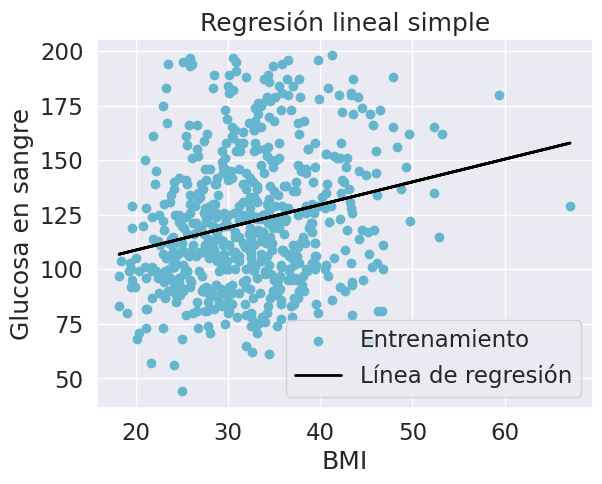

In [ ]:
# Graficar datos de entrenamiento y línea de regresión
# ==============================================================================
plt.scatter(X_train, y_train, color='c', label='Entrenamiento') # Gráfica de dispersión de los datos de entrenamiento 
plt.plot(X_train, y_train_pred, color='black', linewidth=2, label='Línea de regresión') ## Mejor linea para predecir los datos
plt.title('Regresión lineal simple') 
plt.xlabel('BMI')
plt.ylabel('Glucosa en sangre')
plt.legend()
plt.show()

#**Predicciones**

In [ ]:
# ==============================================================================
print('==============================================================================')
num_bmi = 30
num_glu_pred = model.predict([[num_bmi]])
print("BMI:", num_bmi)
print("Glucosa en sangre predicha:", num_glu_pred[0])
# ==============================================================================
print('==============================================================================')
num_bmi = 20
num_glu_pred = model.predict([[num_bmi]])
print("BMI:", num_bmi)
print("Glucosa en sangre predicha:", num_glu_pred[0])

BMI: 30
Glucosa en sangre predicha: [119.20113079]
BMI: 20
Glucosa en sangre predicha: [108.78155814]
